In [1]:
# manipulation data
import pandas as pd
import numpy as np

#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

#default theme
plt.style.use('ggplot')
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [2]:
pip install plotly

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
train=pd.read_csv('blacktrain.csv')
test = pd.read_csv('blacktest.csv')
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.shape

(550068, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


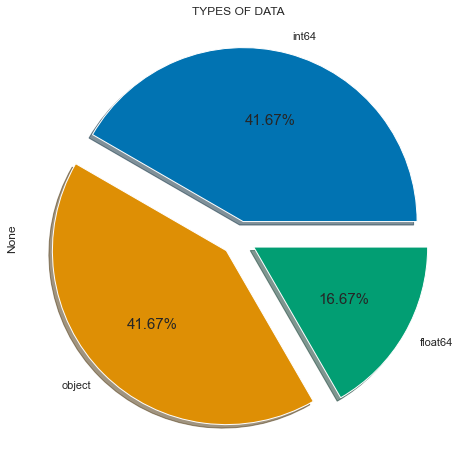

In [6]:
train.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('TYPES OF DATA');

In [7]:
# show the numirical values

num_columns = [f for f in train.columns if train.dtypes[f] != 'object']
num_columns.remove('Purchase')
num_columns.remove('User_ID')
num_columns

['Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [8]:
# show the categorical values

cat_columns = [f for f in train.columns if train.dtypes[f] == 'object']
cat_columns

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [9]:
train.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [10]:
#finding missing values 

missing_values=train.isnull().sum()
percent_missing = train.isnull().sum()/train.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,31.566643


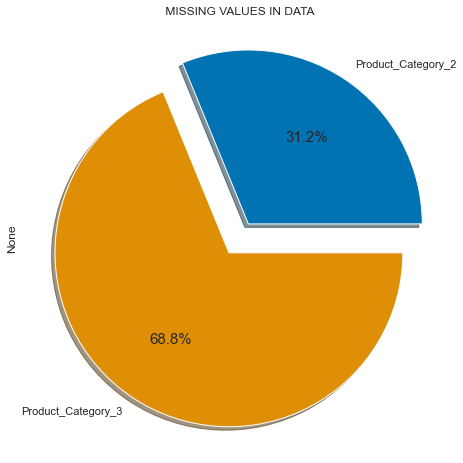

In [11]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title(' MISSING VALUES IN DATA');

In [12]:
train.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [13]:
train.Product_Category_2.describe()

count    376430.000000
mean          9.842329
std           5.086590
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [14]:
# Replace using median 
median = train['Product_Category_2'].median()
train['Product_Category_2'].fillna(median, inplace=True)

In [15]:
train.Product_Category_3.value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [16]:
# drop Product_Category_3 
train=train.drop('Product_Category_3',axis=1)

In [17]:
missing_values=train.isnull().sum()
percent_missing = train.isnull().sum()/train.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.0
Product_ID,0,0.0
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
City_Category,0,0.0
Stay_In_Current_City_Years,0,0.0
Marital_Status,0,0.0
Product_Category_1,0,0.0
Product_Category_2,0,0.0


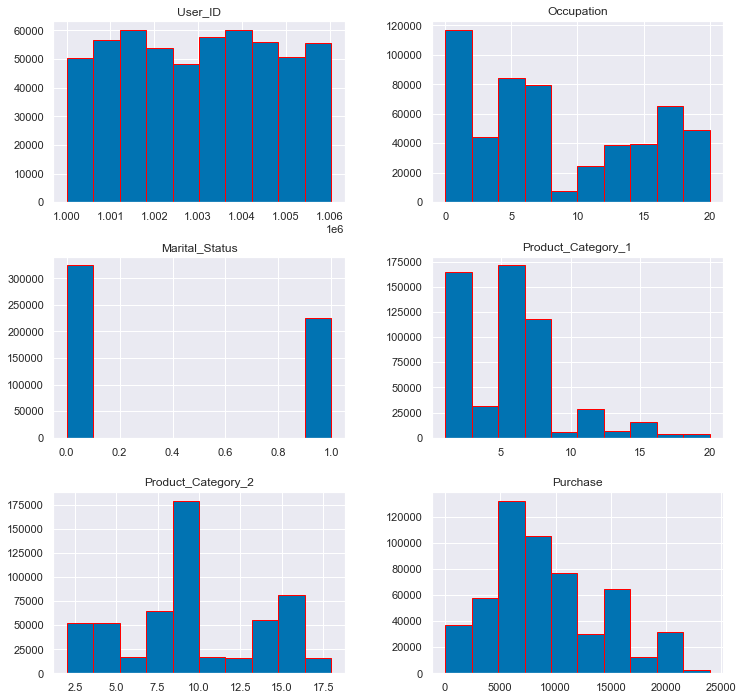

In [18]:
#DATA VISUALISATION

train.hist(edgecolor='red',figsize=(12,12));


In [19]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

C:\Users\Windows\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



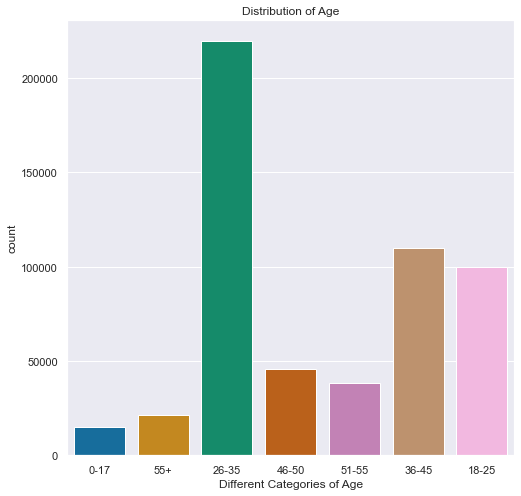

In [20]:
#AGE
sns.countplot(train['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

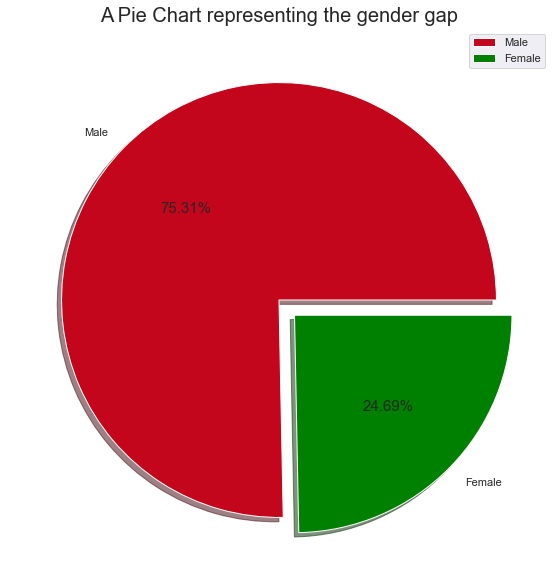

In [21]:
#GENDER 
# pie chart 

size = train['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['#C4061D', 'green']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

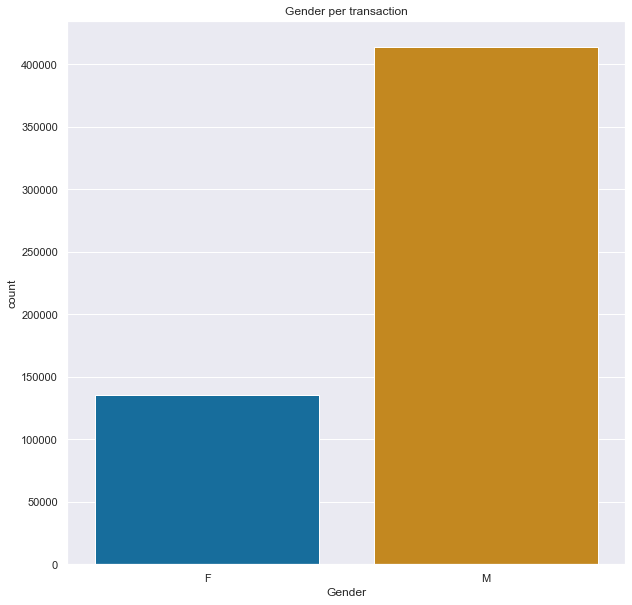

In [22]:
sns.countplot(x=train.Gender)
plt.title('Gender per transaction');

In [23]:
palette=sns.color_palette("Set1")

C:\Users\Windows\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



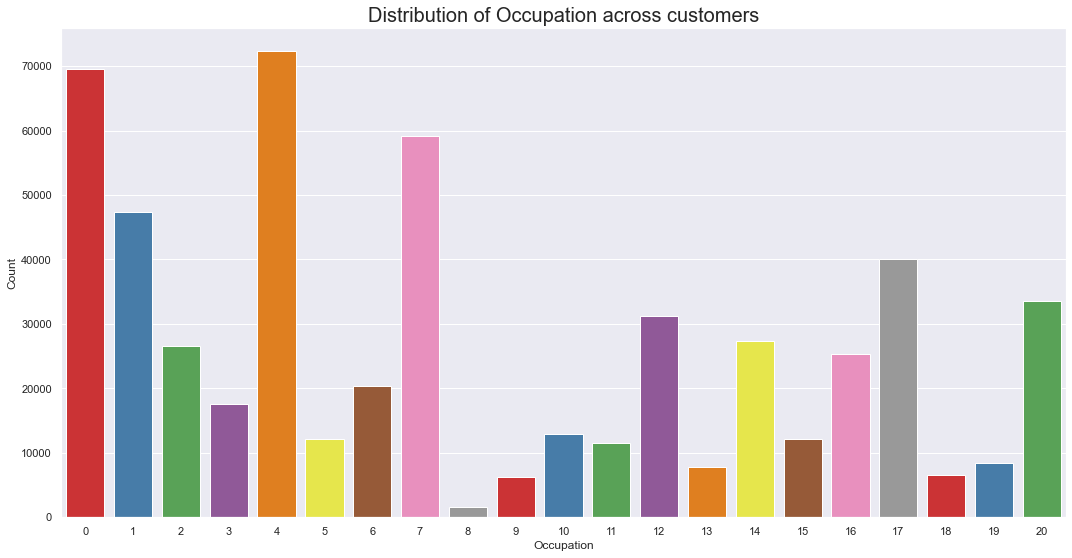

In [24]:
plt.rcParams['figure.figsize'] = (18, 9)
sns.countplot(train['Occupation'], palette = palette)
plt.title('Distribution of Occupation across customers', fontsize = 20)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

C:\Users\Windows\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



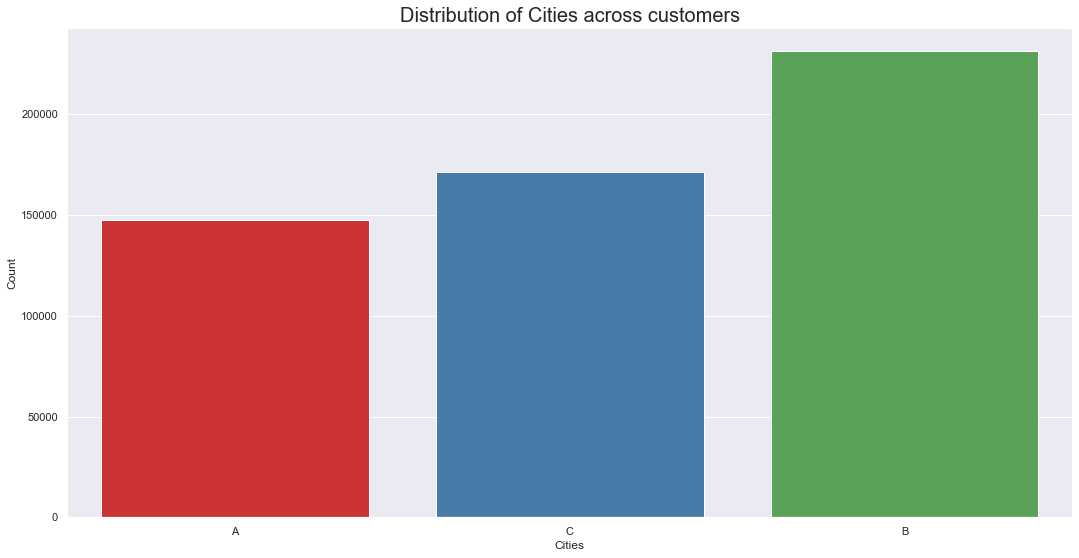

In [25]:
#CITY CATEGORY 
plt.rcParams['figure.figsize'] = (18, 9)
sns.countplot(train['City_Category'], palette = palette)
plt.title('Distribution of Cities across customers', fontsize = 20)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

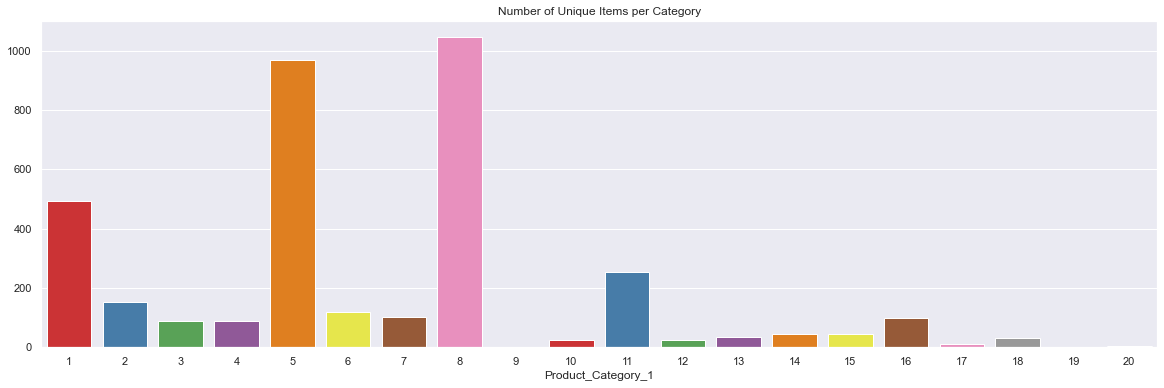

In [26]:
#PRODCTS CATEGORY
plt.figure(figsize=(20,6))
prod_by_cat = train.groupby('Product_Category_1')['Product_ID'].nunique()

sns.barplot(x=prod_by_cat.index,y=prod_by_cat.values, palette=palette)
plt.title('Number of Unique Items per Category')
plt.show()

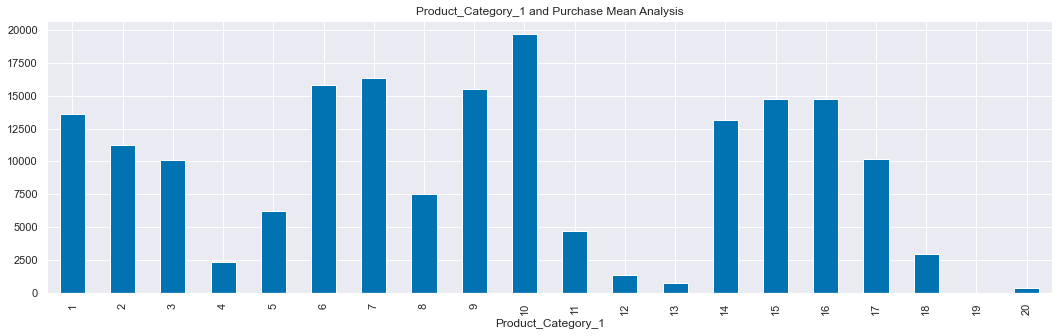

In [27]:
train.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

C:\Users\Windows\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Windows\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



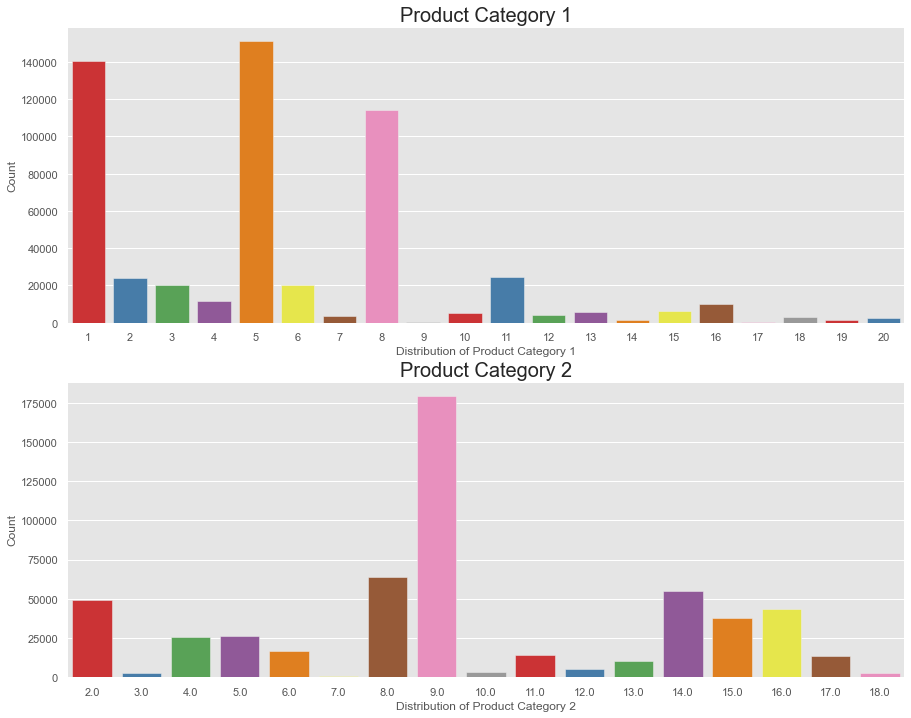

In [28]:
# visualizing the different product categories

plt.rcParams['figure.figsize'] = (15, 25)
plt.style.use('ggplot')

plt.subplot(4, 1, 1)
sns.countplot(train['Product_Category_1'], palette = palette)
plt.title('Product Category 1', fontsize = 20)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.subplot(4, 1, 2)
sns.countplot(train['Product_Category_2'], palette = palette)
plt.title('Product Category 2', fontsize = 20)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')


plt.show()

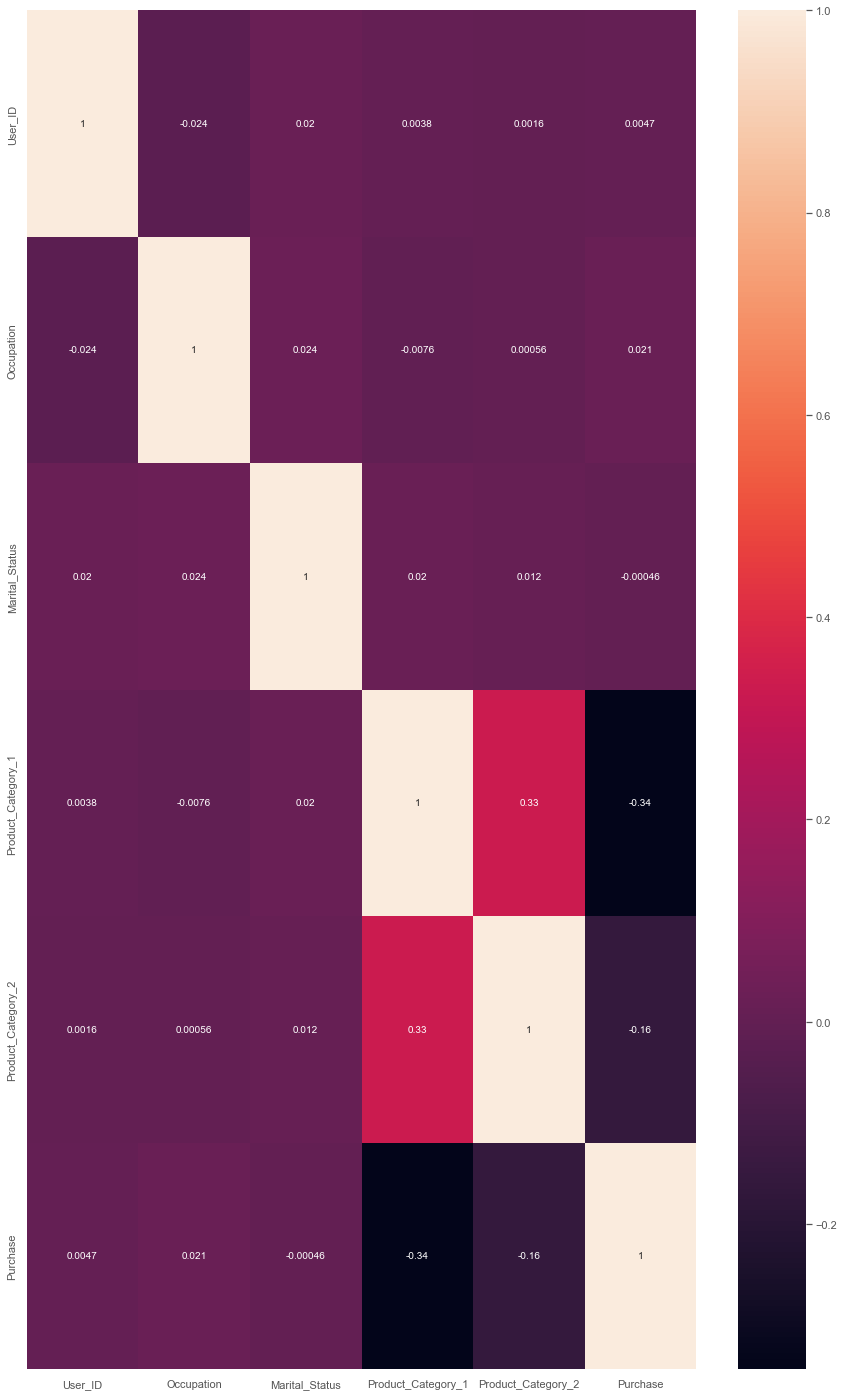

In [29]:
sns.heatmap(train.corr(),annot=True)
plt.show()

In [30]:
#Purchase attribute which is our target variable
# importing important libraries
from scipy import stats
from scipy.stats import norm

C:\Users\Windows\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



The mu 9263.968712959126 and Sigma 5023.060827959928 for the curve


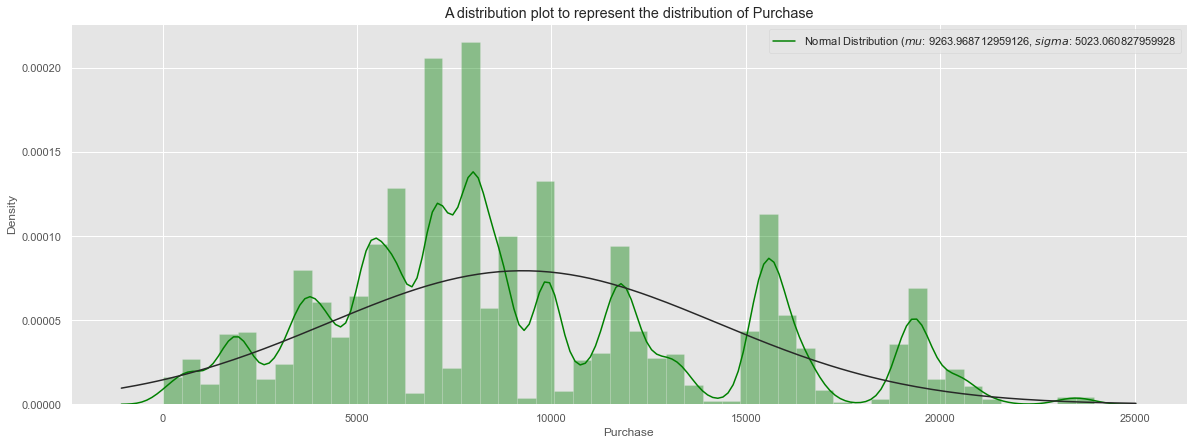

In [31]:
# plotting a distribution plot for the target variable
plt.rcParams['figure.figsize'] = (20, 7)
sns.distplot(train['Purchase'], color = 'green', fit = norm)

# fitting the target variable to the normal curve 
mu, sigma = norm.fit(train['Purchase']) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

In [32]:
#DATA SELECTION
train = train.drop(['Product_ID','User_ID'],axis=1)

In [33]:
# checking the new shape of data
print(train.shape)
train

(550068, 9)


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,9.0,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,9.0,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,9.0,7969
...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,9.0,368
550064,F,26-35,1,C,3,0,20,9.0,371
550065,F,26-35,15,B,4+,1,20,9.0,137
550066,F,55+,1,C,2,0,20,9.0,365


In [34]:
#LABEL ENCODING
df_Gender = pd.get_dummies(train['Gender'])
df_Age = pd.get_dummies(train['Age'])
df_City_Category = pd.get_dummies(train['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(train['Stay_In_Current_City_Years'])

data_final= pd.concat([train, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)

data_final.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,...,51-55,55+,A,B,C,0,1,2,3,4+
0,F,0-17,10,A,2,0,3,9.0,8370,1,...,0,0,1,0,0,0,0,1,0,0
1,F,0-17,10,A,2,0,1,6.0,15200,1,...,0,0,1,0,0,0,0,1,0,0
2,F,0-17,10,A,2,0,12,9.0,1422,1,...,0,0,1,0,0,0,0,1,0,0
3,F,0-17,10,A,2,0,12,14.0,1057,1,...,0,0,1,0,0,0,0,1,0,0
4,M,55+,16,C,4+,0,8,9.0,7969,0,...,0,1,0,0,1,0,0,0,0,1


In [35]:
data_final = data_final.drop(['Gender','Age','City_Category','Stay_In_Current_City_Years'],axis=1)
data_final

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,M,0-17,18-25,26-35,...,51-55,55+,A,B,C,0,1,2,3,4+
0,10,0,3,9.0,8370,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6.0,15200,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,10,0,12,9.0,1422,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14.0,1057,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,16,0,8,9.0,7969,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,13,1,20,9.0,368,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
550064,1,0,20,9.0,371,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
550065,15,1,20,9.0,137,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
550066,1,0,20,9.0,365,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [36]:
data_final.dtypes

Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Purchase                int64
F                       uint8
M                       uint8
0-17                    uint8
18-25                   uint8
26-35                   uint8
36-45                   uint8
46-50                   uint8
51-55                   uint8
55+                     uint8
A                       uint8
B                       uint8
C                       uint8
0                       uint8
1                       uint8
2                       uint8
3                       uint8
4+                      uint8
dtype: object

In [37]:
#Predicting the Amount Spent
#split data
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [38]:
x=data_final.drop('Purchase',axis=1)
y=data_final.Purchase

In [39]:
print(x.shape)
print(y.shape)

(550068, 21)
(550068,)


In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [41]:
# MODEL SELECTION
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [42]:
#1) LinearRegression
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
lr.intercept_

9262.420506327751

In [45]:
lr.coef_

array([ 4.52728774e+01, -2.30739349e+01, -1.63190649e+03, -2.49991938e+02,
        3.84153374e+13,  3.84153374e+13,  6.39078591e+13,  1.50610115e+14,
        1.91516405e+14,  1.56416568e+14,  1.07926747e+14,  9.97902554e+13,
        7.56735989e+13, -1.91796377e+14, -2.13519602e+14, -2.00266178e+14,
       -4.57695089e+15, -6.39308230e+15, -5.19935704e+15, -5.06580770e+15,
       -4.83075742e+15])

In [46]:
y_pred = lr.predict(x_test)

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [48]:
mean_absolute_error(y_test, y_pred)

3592.8130143336543

In [49]:
mean_squared_error(y_test, y_pred)

22041430.96261494

In [50]:
r2_score(y_test, y_pred)

0.126832005525764

In [51]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  4694.830237890923


In [52]:
#2)DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  

In [53]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [54]:
dt_y_pred = regressor.predict(x_test)

In [55]:
mean_absolute_error(y_test, dt_y_pred)

2266.5065167369494

In [56]:
mean_squared_error(y_test, dt_y_pred)

9881337.572588466

In [57]:
r2_score(y_test, dt_y_pred)

0.6085522883875243

In [58]:
from math import sqrt
print("RMSE of Decision tree  Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Decision tree  Model is  3143.4594911639097


In [ ]:
#3)Random forest
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 0) 

In [ ]:
RFregressor.fit(x_train, y_train)

In [ ]:
rf_y_pred = RFregressor.predict(x_test)

In [ ]:
mean_absolute_error(y_test, rf_y_pred)

In [ ]:
from math import sqrt
print("RMSE of Randomforest Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

In [ ]:
#4)XGBoost Regressor
from xgboost.sklearn import XGBRegressor

In [ ]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(x_train, y_train)

In [ ]:
xgb_y_pred = xgb_reg.predict(x_test)

In [ ]:
mean_absolute_error(y_test, xgb_y_pred)

In [ ]:
mean_squared_error(y_test, xgb_y_pred

In [ ]:
r2_score(y_test, xgb_y_pred)

In [ ]:
from math import sqrt
print("RMSE ofXGBooster Regressor Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

# **Among the following models we found that XGBoost classifier has the more Accuracy**

In [69]:
score=lr.score(x_test,y_test)
print('accuracy_score overall:',score)
print('accuracy_score percent:',round(score*750,4))

accuracy_score overall: 0.126832005525764
accuracy_score percent: 95.124
